# Title
Author: Matteo Torres

Repository: https://github.com/matteo-torres/eds220-hwk4

## About
The purpose...

## Highlights
- 

## About the data
The California Fire Perimeter and Prescribed Fire Database offers spatial data on historical wildfires and prescribed burns dating back to 1878. This database is maintained by several agencies, including CAL FIRE, the USDA Forest Service, and the National Park Service.

The Landsat Collection 2 Level-2 dataset includes atmospherically corrected surface reflectance and temperature image data. This dataset, collected from the Landsat 8 satellite, has been pre-processed to exclude data outside land areas. It also features a coarser spatial resolution and a simplified collection of bands: red, green, blue, near-infrared, and shortwave infrared.

## References
California Department of Forestry and Fire Protection. (n.d.). California fire perimeters (all) [Dataset]. Data.gov. https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436

Earth Resources Observation and Science (EROS) Center. (2020). Landsat 8-9 Operational Land Imager / Thermal Infrared Sensor Level-2, Collection 2 [dataset]. U.S. Geological Survey. https://doi.org/10.5066/P9OGBGM6

## Final Output

## Import libraries

In [20]:
import os
import geopandas as gpd
import rioxarray as rioxr
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

## Import data

In [2]:
# Import datasets from data directory
data_dir = os.path.join(os.getcwd(), "data")

landsat = rioxr.open_rasterio(os.path.join(data_dir, "hwk4_landsat_data", "landsat8-2018-01-26-sb-simplified.nc"))
thomas_fire = gpd.read_file(os.path.join(data_dir, "thomas_fire", "thomas_fire.shp"))

## Data exploration

In [3]:
# Look at the landsat raster
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

### Summary
...

In [4]:
# Drop the band dimension
landsat = landsat.squeeze().drop_vars("band")

# Verify
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


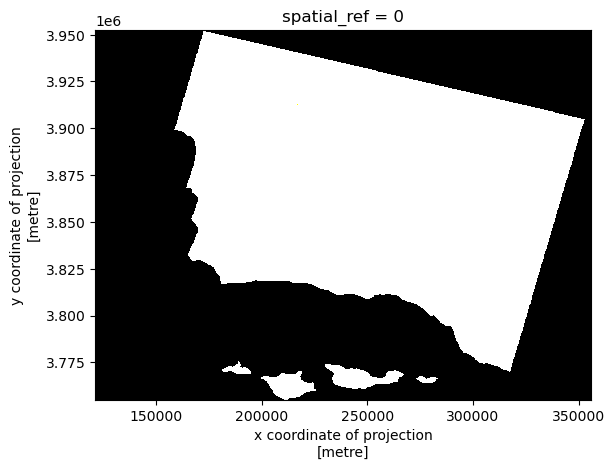

In [5]:
# Create an RGB image
landsat[["red", "green", "blue"]].to_array().plot.imshow()

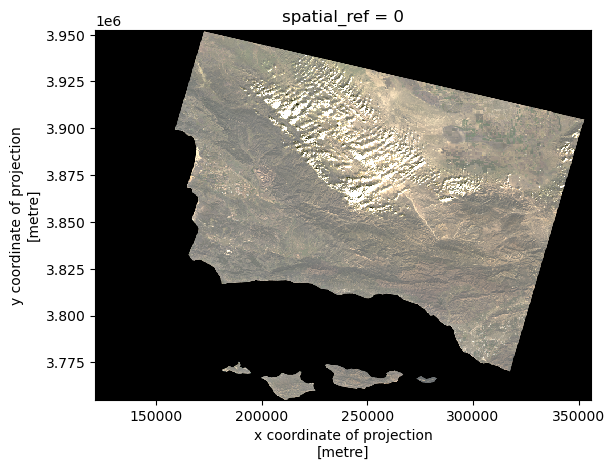

In [6]:
# Adjust the scale used for plotting the bands to get a true color image
landsat[["red", "green", "blue"]].to_array().plot.imshow(robust = True)

Explanation:
...

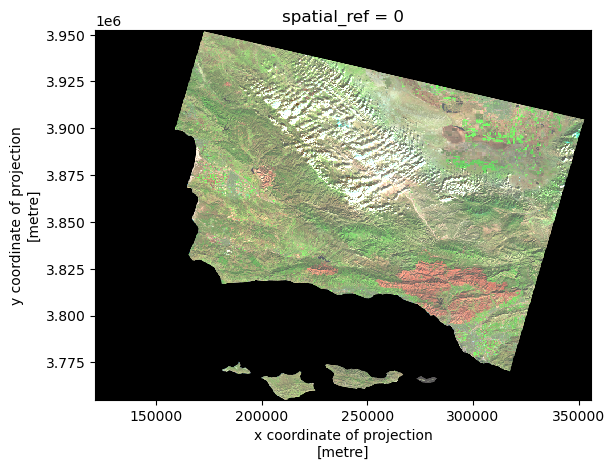

In [7]:
# Create a false color image by plotting the short-wave infrared, near-infrared, and red variables
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True)

In [8]:
# Check for matching CRS
print("landsat CRS: ", landsat.rio.crs)
print("thomas_fire CRS: ", thomas_fire.crs)

landsat CRS:  EPSG:32611
thomas_fire CRS:  EPSG:3857


In [9]:
# Reproject Thomas fire CRS
thomas_fire = thomas_fire.to_crs(landsat.rio.crs)
print('Matched CRS?',  thomas_fire.crs == landsat.rio.crs)

Matched CRS? True


In [14]:
# Raster's aspect ratio
aspect_ratio = landsat.rio.width/landsat.rio.height

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


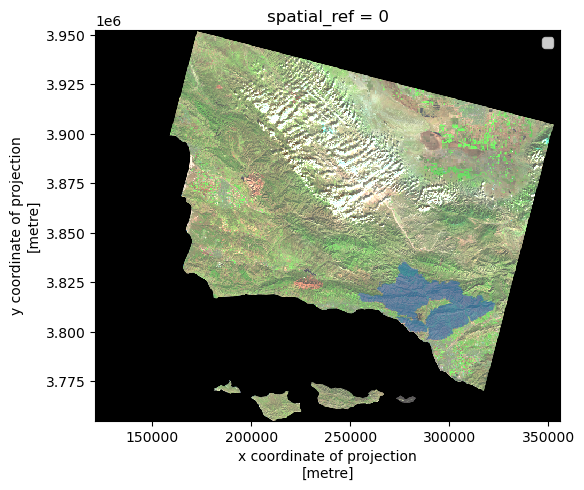

In [32]:
# Plot
fig, ax = plt.subplots(figsize = (6, 6 * aspect_ratio))  # Directly set size and aspect

landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True, ax = ax)

thomas_fire.plot(ax = ax, alpha = 0.6)

plt.show()

In [12]:
# Clip raster
landsat_clip = landsat.rio.clip_box(*thomas_fire.total_bounds)

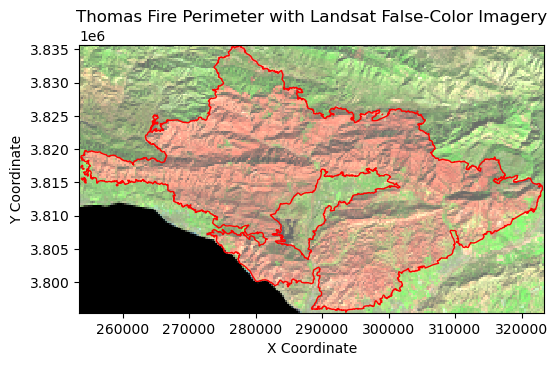

In [44]:
# Plot (clipped)
fig, ax = plt.subplots(figsize = (6, 6 * aspect_ratio))

landsat_clip[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True)

thomas_fire.plot(ax = ax, 
                 facecolor = "none", 
                 edgecolor = "red", 
                 linewidth = 1)

ax.set_title("Thomas Fire Perimeter with Landsat False-Color Imagery")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")

plt.show()